In [1]:
import scanpy as sc
import numpy as np
import multigrate
import gdown
import h5py
from mofapy2.run.entry_point import entry_point

In [2]:
%config InlineBackend.figure_format = 'retina'

# MOFA 2

## Load the dataset

In [3]:
gdown.download(
    'https://drive.google.com/uc?id=1oaVQ7LN5Oe8L3VPoTg_y1ak3PChLwm81',
    'gayoso2020-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1oaVQ7LN5Oe8L3VPoTg_y1ak3PChLwm81
To: /home/aomidi/theis/multigrate/example/gayoso2020-expressions.h5ad
464MB [02:33, 3.03MB/s] 


'gayoso2020-expressions.h5ad'

In [3]:
scrna = sc.read_h5ad('gayoso2020-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 30293 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
gdown.download(
    'https://drive.google.com/uc?id=1B2AR9zY6zacnFj9coQqkLmvT6UCGa9LF',
    'gayoso2020-proteins.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1B2AR9zY6zacnFj9coQqkLmvT6UCGa9LF
To: /home/aomidi/theis/multigrate/example/gayoso2020-proteins.h5ad
57.3MB [00:20, 2.82MB/s]


'gayoso2020-proteins.h5ad'

In [4]:
cite = sc.read_h5ad('gayoso2020-proteins.h5ad')
cite

AnnData object with n_obs × n_vars = 30293 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Data Cleaning

TODO: do this in the preprocessing notebook

In [5]:
scrna.obs.rename(columns={'cell_types': 'cell_type'}, inplace=True)
cite.obs.rename(columns={'cell_types': 'cell_type'}, inplace=True)

In [7]:
scrna1 = scrna[scrna.obs['batch'] == 'SLN111-D1']
scrna2 = scrna[scrna.obs['batch'] == 'SLN208-D2']

In [8]:
scrna1

View of AnnData object with n_obs × n_vars = 8658 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
scrna2

View of AnnData object with n_obs × n_vars = 6587 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
cite1 = cite[cite.obs['batch'] == 'SLN111-D1']
cite2 = cite[cite.obs['batch'] == 'SLN208-D2']

In [11]:
cite1

View of AnnData object with n_obs × n_vars = 8658 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
cite2

View of AnnData object with n_obs × n_vars = 6587 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [13]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [14]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [15]:
ent.set_data_matrix(
    [[scrna1.X.A, scrna2.X.A], [cite1.X, cite2.X]],
    views_names=['scRNA', 'scADT'],
    groups_names=['SLN111-D1', 'SLN208-D2']
)

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='SLN111-D1' with N=8658 samples and D=3999 features...
Successfully loaded view='scRNA' group='SLN208-D2' with N=6587 samples and D=3999 features...
Successfully loaded view='scADT' group='SLN111-D1' with N=8658 samples and D=110 features...
Successfully loaded view='scADT' group='SLN208-D2' with N=6587 samples and D=110 features...




In [16]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scADT): gaussian




In [17]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

Consider training the model with set drop_factor_threshold = -1 and prune them a posteriori


In [18]:
ent.build()

In [19]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -790732313.73 

Iteration 1: time=17.92, ELBO=12307800.19, deltaELBO=803040113.929 (101.55650654%), Factors=19
Iteration 2: time=17.11, ELBO=13489479.05, deltaELBO=1181678.855 (0.14944107%), Factors=18
Iteration 3: time=15.79, ELBO=14012010.52, deltaELBO=522531.468 (0.06608197%), Factors=17
Iteration 4: time=15.27, ELBO=14194435.84, deltaELBO=182425.324 (0.02307043%), Factors=16
Iteration 5: time=14.33, ELBO=14297269.34, deltaELBO=102833.502 (0.01300484%), Factors=15
Iteration 6: time=13.62, ELBO=14334711.97, deltaELBO=37442.625 (0.00473518%), Factors=14
Iteration 7: time=12.78, ELBO=14388990.14, deltaELBO=54278.176 (0.00686429%), Factors=13
Iteration 8: time=12.70, ELBO=14458161.47, deltaELBO=69171.326 (0.00874776%), Factors=13
Iteration 9: time=12.52, ELBO=14501691.81, deltaELBO=43530.340 (0.00550507%), Factors=13
Iteration 10: time=12.57, ELBO=

In [20]:
outfile = 'gayoso2020-mofa.hdf5'
ent.save(outfile)

Saving model in gayoso2020-mofa.hdf5...


In [21]:
f = h5py.File(outfile)

In [22]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T

In [23]:
z.shape

(15245, 13)

In [24]:
# zs = np.concatenate([v[:] for k, v in f["samples"].items()], axis=0).astype(str)
# z = pd.DataFrame(z, index=zs).loc[adata.obs_names.values].to_numpy()

In [25]:
# adata.obsm['X_mofa'] = z
# w = np.concatenate([v[:,:] for k, v in f['expectations']['W'].items()], axis=1).T
# adata.varm['LFs'] = w

In [26]:
# np.concatenate([v[:,:] for k, v in f['expectations']['W'].items()], axis=1).T.shape

In [27]:
# f.keys()

In [28]:
# [v for k, v in f['expectations']['W'].items()]

In [35]:
z = sc.AnnData(z)
z.obs['cell_types'] = scrna[scrna.obs['batch'].isin(['SLN111-D1', 'SLN208-D2'])].obs['cell_types'].tolist()
z.obs['batch'] = scrna[scrna.obs['batch'].isin(['SLN111-D1', 'SLN208-D2'])].obs['batch'].tolist()

In [36]:
sc.pp.neighbors(z)
sc.tl.umap(z)

... storing 'cell_types' as categorical
... storing 'batch' as categorical


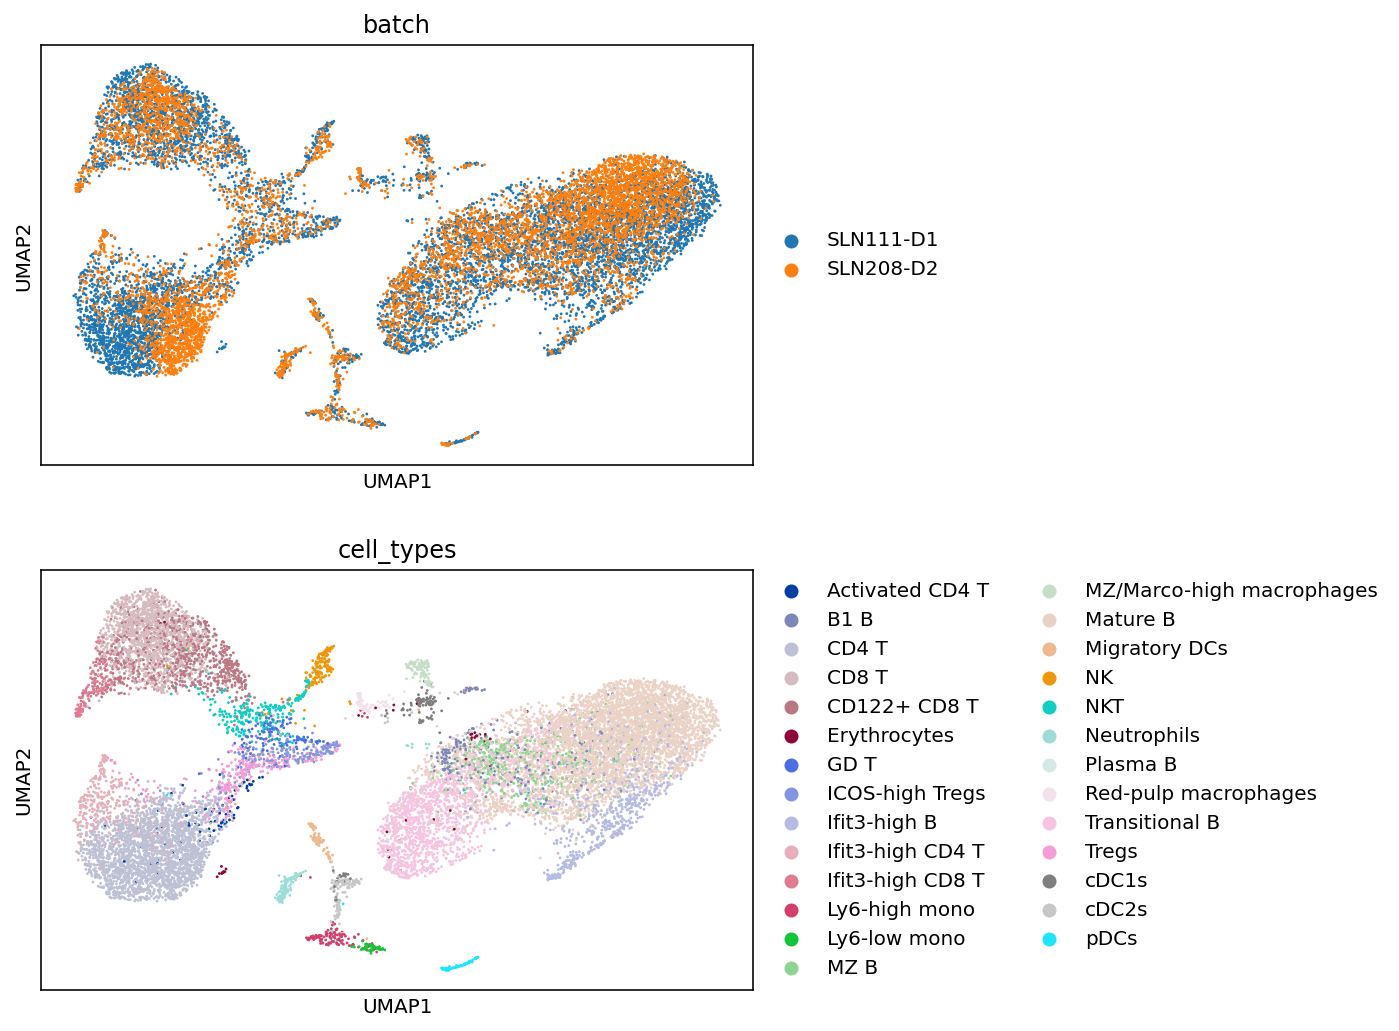

In [37]:
sc.pl.umap(z, color=['batch', 'cell_types'], ncols=1)

In [ ]:
sc.pp.pca(z)
multigrate.metrics.metrics(
    z, z,
    batch_key='batch',
    label_key='cell_types',
    isolated_label_asw=False,
    method='MOFA'
)